In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('cancer_data.csv')

In [3]:
data

,index,Patient Id,Age,Gender,Air Pollution,Dust Allergy,Smoking,Passive Smoker,Snoring,Level
0,0,P1,33,1,2,5,3,2,4,Low
1,1,P10,17,1,3,5,2,4,2,Medium
2,2,P100,35,1,4,6,2,3,2,High
3,3,P1000,37,1,7,7,7,7,5,High
4,4,P101,46,1,6,7,8,7,3,High
...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,8,3,High
996,996,P996,37,2,6,7,7,8,4,High
997,997,P997,25,2,4,6,2,3,2,High
998,998,P998,18,2,6,7,8,7,3,High


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           1000 non-null   int64 
 1   Patient Id      1000 non-null   object
 2   Age             1000 non-null   int64 
 3   Gender          1000 non-null   int64 
 4   Air Pollution   1000 non-null   int64 
 5   Dust Allergy    1000 non-null   int64 
 6   Smoking         1000 non-null   int64 
 7   Passive Smoker  1000 non-null   int64 
 8   Snoring         1000 non-null   int64 
 9   Level           1000 non-null   object
dtypes: int64(8), object(2)
memory usage: 78.3+ KB


In [5]:
# Dataset Values(Max, min, std..)
data.describe()

,index,Age,Gender,Air Pollution,Dust Allergy,Smoking,Passive Smoker,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,5.165000,3.948000,4.195000,2.926000
std,288.819436,12.005493,0.490547,2.0304,1.980833,2.495902,2.311778,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,4.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,6.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000


**Nomer 1**

In [6]:
# Data Correlation: Relationship between columns
data_update1 = data.drop('Patient Id', axis=1)
data_update2 = data_update1.drop('Level', axis=1)
data_update2

,index,Age,Gender,Air Pollution,Dust Allergy,Smoking,Passive Smoker,Snoring
0,0,33,1,2,5,3,2,4
1,1,17,1,3,5,2,4,2
2,2,35,1,4,6,2,3,2
3,3,37,1,7,7,7,7,5
4,4,46,1,6,7,8,7,3
...,...,...,...,...,...,...,...,...
995,995,44,1,6,7,7,8,3
996,996,37,2,6,7,7,8,4
997,997,25,2,4,6,2,3,2
998,998,18,2,6,7,8,7,3


In [7]:
data_update2.corr()

,index,Age,Gender,Air Pollution,Dust Allergy,Smoking,Passive Smoker,Snoring
index,1.000000,0.002674,-0.025739,0.053307,0.037960,0.018407,0.019517,-0.002957
Age,0.002674,1.000000,-0.202086,0.099494,0.035202,0.075333,0.004908,-0.004700
Gender,-0.025739,-0.202086,1.000000,-0.246912,-0.204312,-0.206924,-0.184826,-0.181618
Air Pollution,0.053307,0.099494,-0.246912,1.000000,0.637503,0.481902,0.606764,-0.021343
Dust Allergy,0.037960,0.035202,-0.204312,0.637503,1.000000,0.358691,0.560002,0.052844
Smoking,0.018407,0.075333,-0.206924,0.481902,0.358691,1.000000,0.761622,0.189055
Passive Smoker,0.019517,0.004908,-0.184826,0.606764,0.560002,0.761622,1.000000,0.247943
Snoring,-0.002957,-0.004700,-0.181618,-0.021343,0.052844,0.189055,0.247943,1.000000


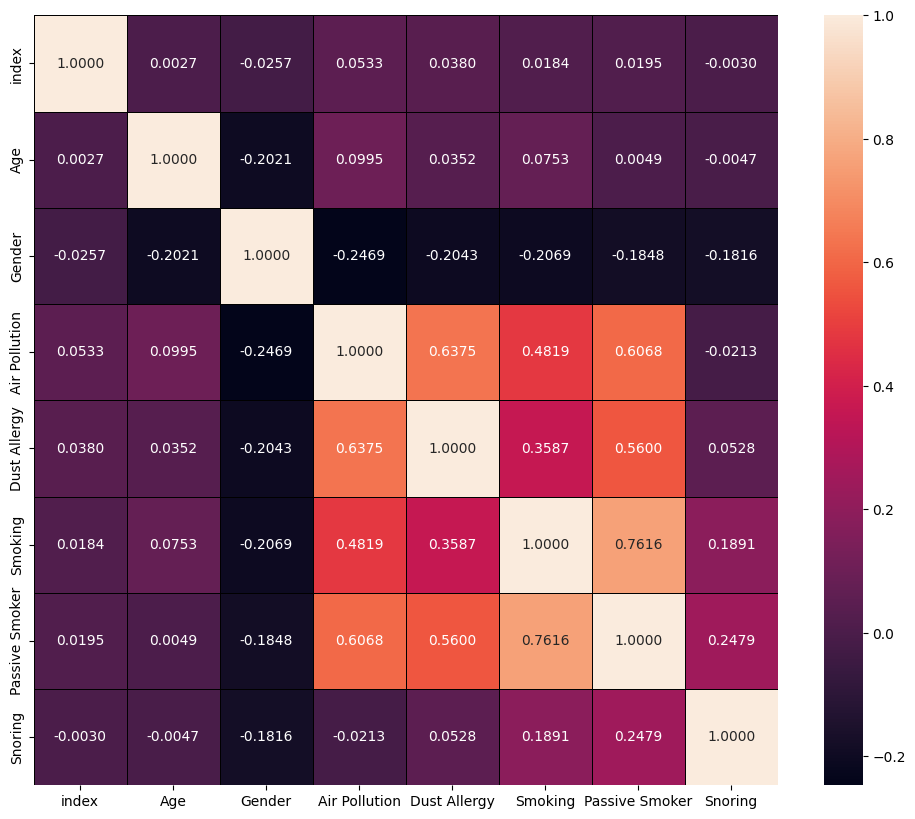

In [8]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data_update2.corr(), annot = True, linewidths=0.5,
            linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

**Nomer 2**

In [9]:
# Standarisasi data numerik
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(data_update2)

In [10]:
# Menerapkan PCA
pca = PCA()
principal_components = pca.fit_transform(numeric_scaled)

In [11]:
# Varians yang dijelaskan oleh setiap komponen utama
explained_variance_ratio = pca.explained_variance_ratio_

In [12]:
# Tampilkan varians yang dijelaskan oleh setiap komponen utama
explained_variance_ratio

array([0.35808296, 0.14329402, 0.13573047, 0.12430738, 0.09638998,
       0.07747767, 0.04121429, 0.02350322])

**Nomer 3**

In [13]:
data_svm = pd.read_csv('cancer_data.csv')

In [14]:
# Dataset columns names
# data.columns

In [15]:
data_svm = pd.read_csv('cancer_data.csv')

In [16]:
data_svm

,index,Patient Id,Age,Gender,Air Pollution,Dust Allergy,Smoking,Passive Smoker,Snoring,Level
0,0,P1,33,1,2,5,3,2,4,Low
1,1,P10,17,1,3,5,2,4,2,Medium
2,2,P100,35,1,4,6,2,3,2,High
3,3,P1000,37,1,7,7,7,7,5,High
4,4,P101,46,1,6,7,8,7,3,High
...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,8,3,High
996,996,P996,37,2,6,7,7,8,4,High
997,997,P997,25,2,4,6,2,3,2,High
998,998,P998,18,2,6,7,8,7,3,High


Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

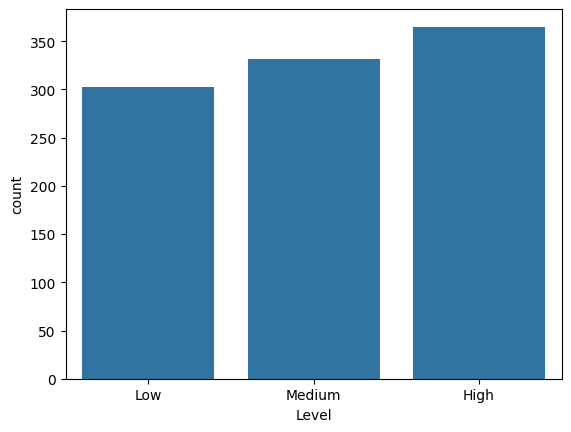

In [17]:
# First Visual
# The number of Class in the dataset and its graphic.
sns.countplot(x = "Level", data = data_svm)
data_svm.loc[:,"Level"].value_counts()

In [18]:
# x_data
x_data = data_svm.drop(["index", "Patient Id", "Level"], axis = 1)

#y_data
y_data = data_svm.Level.values

In [19]:
x_data

,Age,Gender,Air Pollution,Dust Allergy,Smoking,Passive Smoker,Snoring
0,33,1,2,5,3,2,4
1,17,1,3,5,2,4,2
2,35,1,4,6,2,3,2
3,37,1,7,7,7,7,5
4,46,1,6,7,8,7,3
...,...,...,...,...,...,...,...
995,44,1,6,7,7,8,3
996,37,2,6,7,7,8,4
997,25,2,4,6,2,3,2
998,18,2,6,7,8,7,3


In [20]:
y_data

array(['Low', 'Medium', 'High', 'High', 'High', 'High', 'Low', 'Low',
       'Medium', 'Medium', 'High', 'High', 'Medium', 'High', 'Low',
       'Medium', 'Medium', 'High', 'High', 'Medium', 'High', 'High',
       'High', 'High', 'High', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'High', 'High', 'Medium', 'Low', 'Low', 'Medium', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'High', 'High', 'High', 'Medium',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'Medium', 'High', 'High', 'High', 'High', 'High',
   

In [21]:
#Normalization
x_data = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

In [22]:
x_data

,Age,Gender,Air Pollution,Dust Allergy,Smoking,Passive Smoker,Snoring
0,0.444444,0.000000,0.013889,0.055556,0.027778,0.013889,0.041667
1,0.222222,0.000000,0.027778,0.055556,0.013889,0.041667,0.013889
2,0.472222,0.000000,0.041667,0.069444,0.013889,0.027778,0.013889
3,0.500000,0.000000,0.083333,0.083333,0.083333,0.083333,0.055556
4,0.625000,0.000000,0.069444,0.083333,0.097222,0.083333,0.027778
...,...,...,...,...,...,...,...
995,0.597222,0.000000,0.069444,0.083333,0.083333,0.097222,0.027778
996,0.500000,0.013889,0.069444,0.083333,0.083333,0.097222,0.041667
997,0.333333,0.013889,0.041667,0.069444,0.013889,0.027778,0.013889
998,0.236111,0.013889,0.069444,0.083333,0.097222,0.083333,0.027778


In [23]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,
                                                    random_state = 1)

In [24]:
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

print("print accuracy of svm algo:", svm.score(x_test, y_test))

print accuracy of svm algo: 0.83


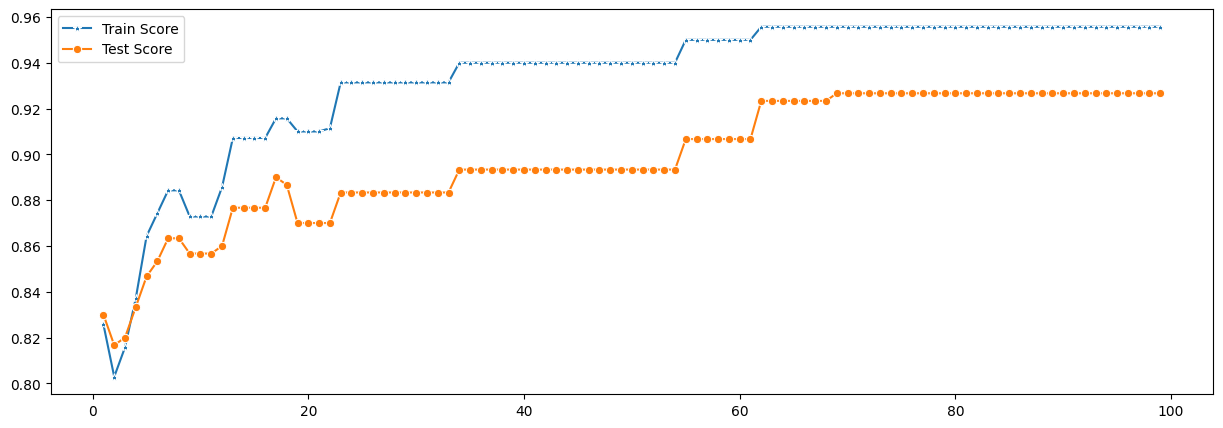

In [25]:
test_score_list = []
train_score_list = []

for i in range(1,100):
    svm2 = SVC(C=i)
    svm2.fit(x_train, y_train)
    test_score_list.append(svm2.score(x_test, y_test))
    train_score_list.append(svm2.score(x_train, y_train))
    
plt.figure(figsize=(15,5))
p = sns.lineplot(x=range(1,100),y=train_score_list,marker='*',label='Train Score')
q = sns.lineplot(x=range(1,100),y=test_score_list,marker='o',label='Test Score')

In [26]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

grid={"C":[1, 100, 1000],"kernel":["linear","poly","sigmoid"]}

svm3 = SVC(random_state = 1)

svm3.fit(x_train, y_train)

print("test accuracy {}".format(svm3.score(x_test,y_test)))
print("Train accuracy {}".format(svm3.score(x_train, y_train)))

svm3_gscv=GridSearchCV(svm3,grid,cv=10)
svm3_gscv.fit(x_test,y_test)

test accuracy 0.83
Train accuracy 0.8257142857142857


GridSearchCV(cv=10, estimator=SVC(random_state=1),
             param_grid={'C': [1, 100, 1000],
                         'kernel': ['linear', 'poly', 'sigmoid']})

In [27]:
print("best hyperparameters: ", svm3_gscv.best_params_)
print("accuracy: ", svm3_gscv.best_score_)

best hyperparameters:  {'C': 1000, 'kernel': 'poly'}
accuracy:  0.85


In [28]:
svm4 = SVC(C = 1, kernel="poly")

print("test accuracy: {} ".format(svm4.fit(x_test, y_test).score(x_test, y_test)))
print("train accuracy: {} ".format(svm4.fit(x_train, y_train).score(x_train, y_train)))

test accuracy: 0.7866666666666666 
train accuracy: 0.8171428571428572 
